<a href="https://colab.research.google.com/github/ryukrodit/assignment-/blob/main/2358289_RoditNepal_WorkSheet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise-1**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
img = Image.open("/content/drive/MyDrive/AI_ML/lenna_image.png")

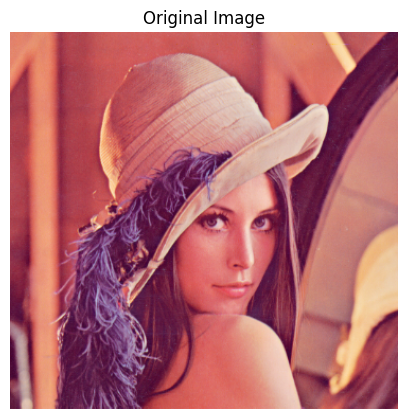

In [4]:
# Display the original image
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [5]:
# Convert image to NumPy array
img_array = np.array(img)

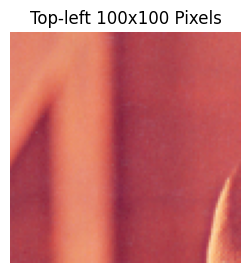

In [6]:
# Extract and display the top-left 100x100 pixels
top_left = img_array[:100, :100]
plt.figure(figsize=(3,3))
plt.imshow(top_left)
plt.title("Top-left 100x100 Pixels")
plt.axis("off")
plt.show()

In [7]:
# Task 3: Extract and display R, G, and B channels
r_channel = img_array[:, :, 0]  # Red channel
g_channel = img_array[:, :, 1]  # Green channel
b_channel = img_array[:, :, 2]  # Blue channel

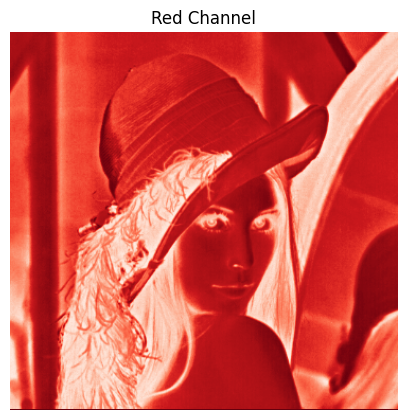

In [11]:
# Display the Red channel
plt.figure(figsize=(5,5))
plt.imshow(r_channel, cmap="Reds")
plt.title("Red Channel")
plt.axis("off")
plt.show()

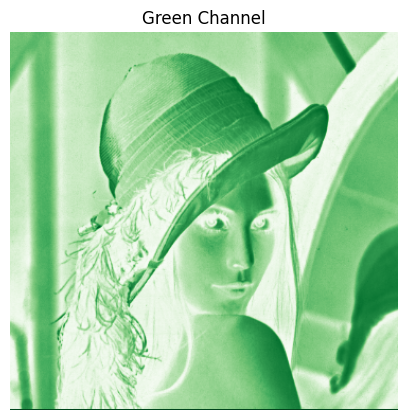

In [12]:
# Display the Green channel
plt.figure(figsize=(5,5))
plt.imshow(g_channel, cmap="Greens")
plt.title("Green Channel")
plt.axis("off")
plt.show()

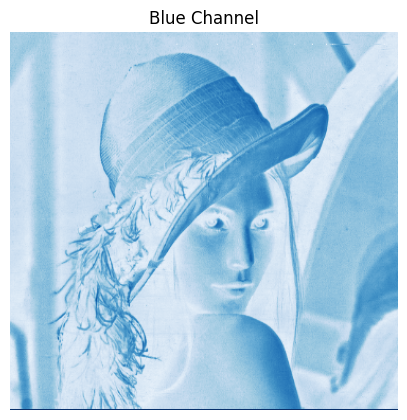

In [13]:
# Display the Blue channel
plt.figure(figsize=(5,5))
plt.imshow(b_channel, cmap="Blues")
plt.title("Blue Channel")
plt.axis("off")
plt.show()

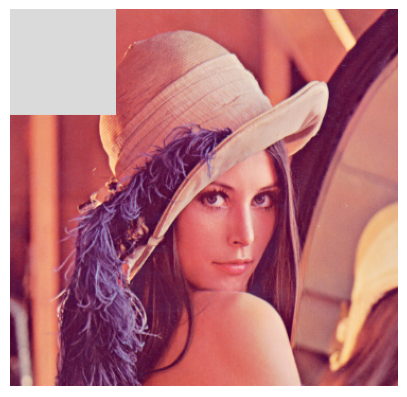

In [10]:
#  Modify the top 100x100 pixels to 210 (light gray)
modified_img = img_array.copy()
modified_img[:100, :100] = 210


plt.figure(figsize=(5,5))
plt.imshow(modified_img)
plt.axis("off")
plt.show()

**Exercise**-**2**

In [14]:
gray_img = Image.open("/content/drive/MyDrive/AI_ML/camera_man.jpg").convert("L")

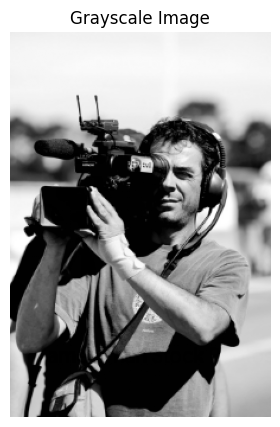

In [15]:
# Display the grayscale image
plt.figure(figsize=(5,5))
plt.imshow(gray_img, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

In [16]:
# Convert image to NumPy array
gray_array = np.array(gray_img)

In [17]:
#Extract and display the middle 150-pixel section
height, width = gray_array.shape
start_x = width // 2 - 75
end_x = width // 2 + 75
middle_section = gray_array[:, start_x:end_x]

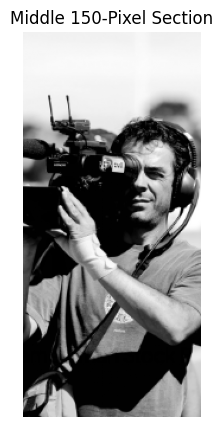

In [18]:
# Display the middle section
plt.figure(figsize=(5,5))
plt.imshow(middle_section, cmap="gray")
plt.title("Middle 150-Pixel Section")
plt.axis("off")
plt.show()

In [19]:
# Apply a threshold (Binary Image)
threshold_img = np.where(gray_array < 100, 0, 255)

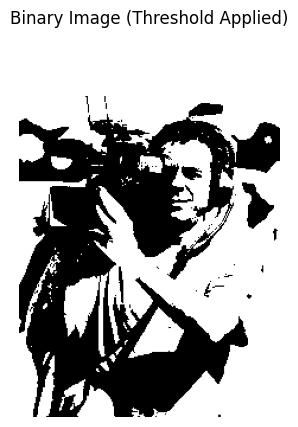

In [20]:
# Display the binary image
plt.figure(figsize=(5,5))
plt.imshow(threshold_img, cmap="gray")
plt.title("Binary Image (Threshold Applied)")
plt.axis("off")
plt.show()

In [21]:
#Rotate the image 90 degrees clockwise
rotated_img = np.rot90(gray_array, k=-1)

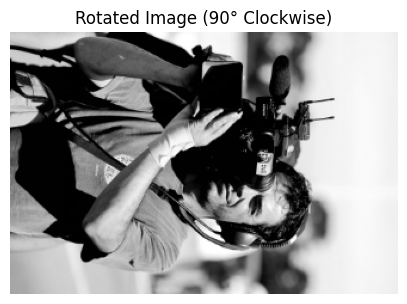

In [22]:
# Display the rotated image
plt.figure(figsize=(5,5))
plt.imshow(rotated_img, cmap="gray")
plt.title("Rotated Image (90° Clockwise)")
plt.axis("off")
plt.show()

In [23]:
#Convert the grayscale image to RGB
rgb_img = np.stack([gray_array]*3, axis=-1)

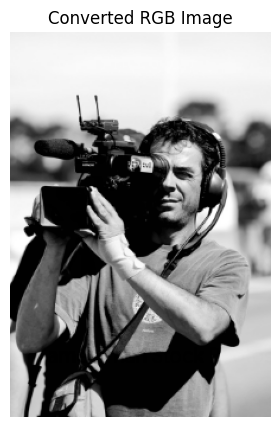

In [24]:
# Display the RGB image
plt.figure(figsize=(5,5))
plt.imshow(rgb_img)
plt.title("Converted RGB Image")
plt.axis("off")
plt.show()

**Exercise-3**

In [26]:
# Convert image to grayscale
gray_img = Image.fromarray(img_array).convert("L")
gray_array = np.array(gray_img, dtype=np.float64)

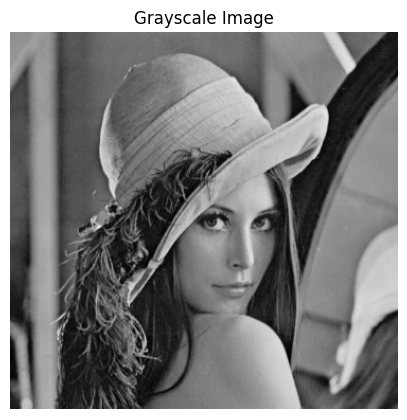

In [27]:
# Display the grayscale image
plt.figure(figsize=(5,5))
plt.imshow(gray_array, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

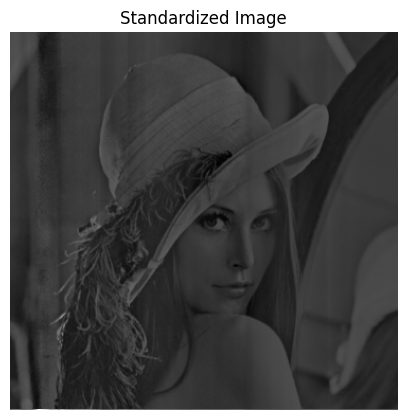

In [36]:
# Compute mean and standard deviation
mean_pixel = np.mean(gray_array, axis=0)
std_pixel = np.std(gray_array, axis=0)

# Standardize the image
standardized_data = (gray_array - mean_pixel) / (std_pixel + 1e-8)

# Display standardized image
plt.figure(figsize=(5,5))
plt.imshow(standardized_data, cmap="gray")
plt.title("Standardized Image")
plt.axis("off")
plt.show()


In [37]:
# Compute covariance matrix
cov_matrix = np.dot(standardized_data.T, standardized_data) / (gray_array.shape[0] - 1)

# Print covariance matrix shape
print("Covariance Matrix Shape:", cov_matrix.shape)


Covariance Matrix Shape: (366, 366)


In [38]:
# Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Print the number of eigenvalues obtained
print("Number of Eigenvalues:", len(eigenvalues))


Number of Eigenvalues: 366


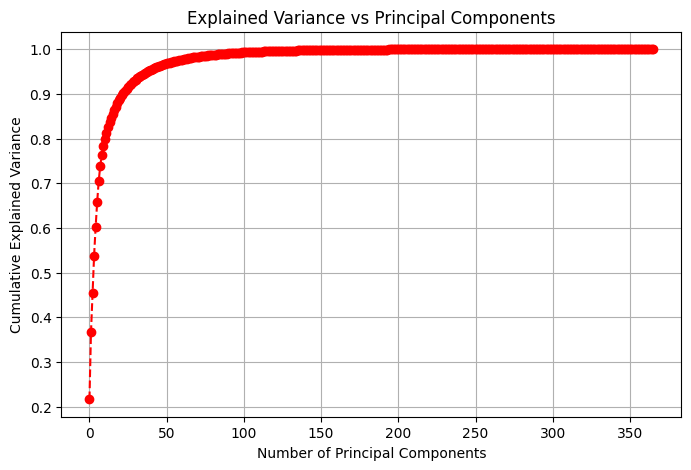

In [39]:
# Sort Eigenvalues and Eigenvectors in Descending Order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Compute explained variance
explained_variance = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='r')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Principal Components")
plt.grid()
plt.show()


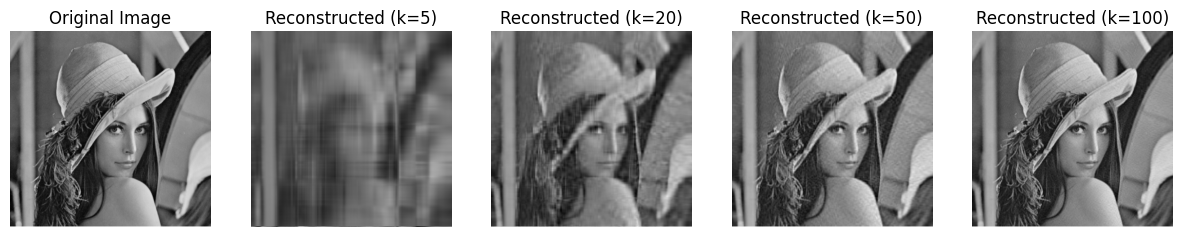

In [40]:
# Define different numbers of principal components to try
components_list = [5, 20, 50, 100]

# Create a figure to show results
fig, axes = plt.subplots(1, len(components_list) + 1, figsize=(15,5))

# Show original grayscale image
axes[0].imshow(gray_array, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

# Loop through different principal component values
for i, k in enumerate(components_list):
    # Select top k eigenvectors
    selected_eigenvectors = eigenvectors[:, :k]

    # Transform data into lower-dimensional space
    compressed_data = np.dot(standardized_data, selected_eigenvectors)

    # Reconstruct the image
    reconstructed_img = np.dot(compressed_data, selected_eigenvectors.T) * std_pixel + mean_pixel

    # Display the reconstructed image
    axes[i+1].imshow(reconstructed_img, cmap="gray")
    axes[i+1].set_title(f"Reconstructed (k={k})")
    axes[i+1].axis("off")

plt.show()
